# Brunel 10K Neuron Network Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numba import jit
plt.style.use('seaborn-paper')


%matplotlib inline

#### Loading auryn weights

In [2]:
from scipy.io import mmread
aurynweightmatrix = mmread('../auryn/network.dat.0.0.wmat')

#### Loading NEST weights

In [5]:
# Loading nest weights
nestweights = np.loadtxt("../pyNest/PlasticSynapseWeights.txt")

#### Loading ANNarchy weights

In [6]:
# Loading nest weights
annarchyweights = np.loadtxt("../ANNarchy/plasticweights.txt")

#### Loading Brian2 weights

In [7]:
# Loading nest weights
brian2weights = np.loadtxt("../brian2/plasticweights.txt")

#### Loading Spike weights

In [28]:
prefile = "../Spike/Build/BRUNELPLASTIC_PresynapticIDs.bin"
postfile = "../Spike/Build/BRUNELPLASTIC_PostsynapticIDs.bin"
weightfile = "../Spike/Build/BRUNELPLASTIC_SynapticWeights.bin"


spike_network_df = pd.DataFrame(data = {"pre": np.fromfile(prefile, dtype=np.int32), "post": np.fromfile(postfile, dtype=np.int32), "weight": np.fromfile(weightfile, dtype=np.float32)})

In [29]:
spikeweights = spike_network_df["weight"]

### Loading GeNN weights

In [31]:
weightfile = "../genn/Weights.bin"
gennweights = np.fromfile(weightfile, dtype=np.float32)

### Plotting Weight Histograms after 20s of Simulation

In [32]:
data = [
    spikeweights.values*1000,
    annarchyweights.flatten(),
    aurynweightmatrix.data*1000,
    brian2weights,
    nestweights,
    gennweights
]

labels = [
    "Spike",
    "ANNarchy",
    "Auryn",
    "Brian2",
    "Nest",
    "GeNN"
]

colors = [
    "red",
    "orange",
    "blue",
    "purple",
    "green",
    "magenta"
]

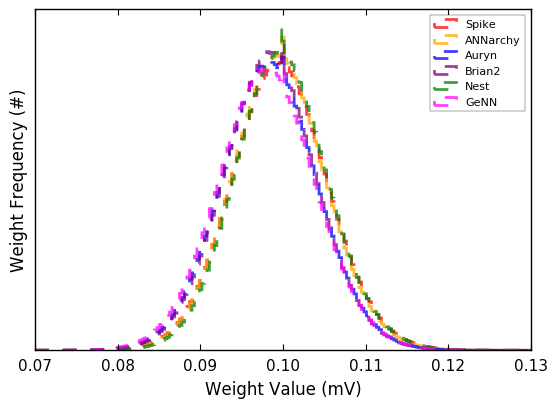

In [33]:
plt.style.use('seaborn-paper')
# plt.rcParams['figure.figsize'] = (12.0, 10.0)

mylinestyles = ['-' , '--' , '-.' , ':' , '-', '--']

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
binvals = np.linspace(0.07,0.13,200)

for sim in range(len(data)):
    _ = ax.hist(data[sim], bins=binvals, color=colors[sim], label=labels[sim], histtype='step', alpha=0.75, linewidth=2, linestyle=((sim-3)*20, (10, 10)))

plt.legend()
plt.xlabel("Weight Value (mV)", size=12)
plt.ylabel("Weight Frequency (#)", size=12)
ax.xaxis.set_tick_params(labelsize=11)
plt.xlim([0.07, 0.13])
_ = plt.yticks([])

fig.savefig('weightRange_comparison.png', dpi=300)
